/Users/tylersingleton/Projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tylersingleton/Projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tylersingleton/Projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tylersingleton/Projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tylersingleton/Projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tylersingleton/Projects/.venv/lib/python3.13/site-p


Linear Regression Metrics:
Accuracy   - 0.9780
Precision  - 0.9780
Recall     - 0.9780
F1-Score   - 0.9780

15-NN Metrics:
Accuracy   - 0.9790
Precision  - 0.9809
Recall     - 0.9770
F1-Score   - 0.9790


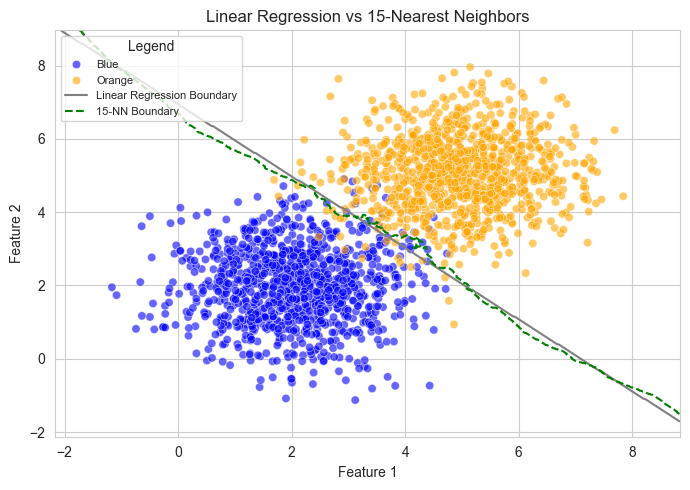

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sns.set_style("whitegrid")

#generate datasets
n_samples = 1000
data_blue = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], n_samples)
data_orange = np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], n_samples)

# assign class lables to the data...
X = np.vstack((data_blue, data_orange))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

#simple train function for either model type...
def evaluate_model(y_true, y_pred, model_name):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric:10} - {value:.4f}")
    return metrics

#fit models:
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = (lr.predict(X) >= 0.5).astype(int)
evaluate_model(y, y_pred_lr, "Linear Regression")

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)
y_pred_knn = knn.predict(X)
evaluate_model(y, y_pred_knn, "15-NN")

# define the plot
plt.figure(figsize=(7, 5))
colors = ['blue', 'orange']
labels = ['Blue', 'Orange']

scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1],
                         hue=np.where(y == 0, labels[0], labels[1]),
                         palette=colors, alpha=0.6)

# decision bounds for each model:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]



# plotting the decision boundaries
for model, style, color, label in [
    (lr, '-', 'gray', 'Linear Regression'),
    (knn, '--', 'green', '15-NN')
]:
    Z = model.predict(grid)
    if isinstance(model, LinearRegression):
        Z = (Z >= 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5],
                colors=color, linestyles=style)

legend_elements = scatter.legend_.legend_handles[:2]
custom_lines = [Line2D([0], [0], color='gray', linestyle='-'),
               Line2D([0], [0], color='green', linestyle='--')]
legend_elements.extend(custom_lines)

plt.title('Linear Regression vs 15-Nearest Neighbors', fontsize=12)
plt.xlabel('Feature 1', fontsize=10)
plt.ylabel('Feature 2', fontsize=10)
labels = ['Blue', 'Orange', 'Linear Regression Boundary', '15-NN Boundary']
plt.legend(handles=legend_elements, labels=labels,
          title='Legend',
          title_fontsize=10, fontsize=8)

plt.tight_layout()
plt.show()